## Convolutional Neural Network using pytorch : Character Recognition Problem

In [81]:
# Importing all necessary libraries
import torch
import torch.nn as nn # because we will use module package to define the CNN
import torchvision.transforms as transforms # because we will use to_tensor to convert our image to torch tensor
import torchvision.datasets as datasets  # we will use MNIST dataset
from torch.autograd import Variable  # we will wrap dataset values / not required from Pytorch version 0.4
import torch.utils.data as data # to user DataLoader utility to make dataset iterable

In [86]:
#Donloading the test and train datasets from pytorch library
#converting it to tensor and normaizing it
mean_gray = 0.1307  # ?? how to derive this value
stddev_gray = 0.3081 # ?? how to derive this value

#Transform the images to tensors
#Normalize a tensor image with mean and standard deviation. Given mean: (M1,...,Mn) and std: (S1,..,Sn) 
#for n channels, this transform will normalize each channel of the input torch.Tensor
#i.e. input[channel] = (input[channel] - mean[channel]) / std[channel]

# Compose :Composes several transforms together.
# Normalize : we need to pass mean and std for each channel, 
#as we are using grey scale image so we are passing here only one value for mean and std
# earlier cases we were using sklearn to download the MNIST dataset, here we are using torchvision
transforms = transforms.Compose([transforms.ToTensor (),transforms.Normalize((mean_gray,), (stddev_gray,))])

#load datasets
train_dataset = datasets.MNIST(root='./',
                               train=True,
                               download=True,
                               transform=transforms
                               )
test_dataset = datasets.MNIST(root='./',
                               train=False,
                               download=True,
                               transform=transforms
                               )


original data : tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,   0,  

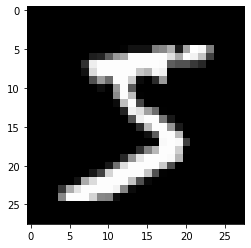

In [87]:
# See the impact of the transformation we can run this once without transformation and
# again after transformation to see how original data has difference w.r.t transformed data
# This item is open need further research on this
print('original data :',train_dataset.train_data[0])
print('original data :',train_dataset.train_labels[0].item())
print('Transformed Data : ' ,train_dataset[0][0].numpy())
print('Transformed Data : ' ,train_dataset[0][1])




5


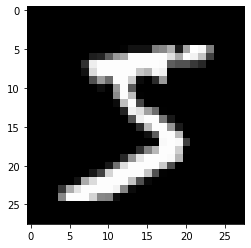

In [89]:
import matplotlib.pyplot as plt
random_image = train_dataset[0][0].numpy()
plt.imshow(random_image.reshape(28, 28), cmap='gray')
print(train_dataset[0][1])   #Print the corresponding label for the image

In [95]:
# Make the dataset iterable
batch_size = 100

train_load=data.DataLoader(dataset=train_dataset,
                           batch_size=batch_size,
                           shuffle=True)
test_load=data.DataLoader(dataset=test_dataset,
                           batch_size=batch_size,
                           shuffle=False)

In [96]:
print('There are {} images in the training set'.format(len(train_dataset)))
print('There are {} images in the test set'.format(len(test_dataset)))
print('There are {} batches in the train loader'.format(len(train_load)))
print('There are {} batches in the testloader'.format(len(test_load)))

There are 60000 images in the training set
There are 10000 images in the test set
There are 600 batches in the train loader
There are 100 batches in the testloader


![cnn mnist](https://user-images.githubusercontent.com/30661597/61713471-3c957d00-ad8b-11e9-9a38-e3f4d1e72565.png)

In [102]:
# Defining the CNN architecture
class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        #Same Padding = [(filter size - 1) / 2] (Same Padding--> input size = output size)
        # How we are deriving that 8 filters needed/ filter size should be 3x3?
        # there is no stated rule, normally everyone try to follow the state-of-the-art architecture
        # for kernal size 3x3 and 5x5 is advised in many tutorials
        # for grey scale image channel is 1 and for RGB 3
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=8, kernel_size=3,stride=1, padding=1)
        #The output size of each of the 8 feature maps is 
        #[(input_size - filter_size + 2(padding) / stride) +1] --> [(28-3+2(1)/1)+1] = 28 (padding type is same)
        #Batch normalization
        self.batchnorm1 = nn.BatchNorm2d(8) # passing no of filters
        #RELU
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(kernel_size=2) # i.e 2x2
        #After max pooling, the output of each feature map is now 28/2 = 14
        self.cnn2 = nn.Conv2d(in_channels=8, out_channels=32, kernel_size=5,stride=1, padding=2)
        #[(input_size - filter_size + 2(padding) / stride) +1] --> [(14-5+2*(2)/1)+1] = 14 (same padding)
        self.batchnorm2 = nn.BatchNorm2d(32)
        #After max pooling, the output of each feature map is 14/2 = 7
        #Flatten the feature maps. You have 32 feature maps, each of them is of size 7x7 --> 32*7*7 = 1568
        self.fc1 = nn.Linear(in_features=1568, out_features=600)
        self.droput = nn.Dropout(p=0.5) #50% neurons will be dropped during training phase
        self.fc2 = nn.Linear(in_features=600, out_features=10)
        
    def forward(self,x):
        out=self.cnn1(x)
        out=self.batchnorm1(out)
        out=self.relu(out)
        out=self.maxpool(out)
        out=self.cnn2(out)
        out=self.batchnorm2(out)
        out=self.relu(out)
        out=self.maxpool(out)
        #Now we have to flatten the output. This is where we apply the feed forward neural network as learned before! 
        #It will take the shape (batch_size, 1568) = (100, 1568)
        out=out.view(-1,1568)
        out=self.fc1(out)
        out=self.relu(out)
        out=self.droput(out)
        out=self.fc2(out)
        return out        

In [103]:
model=CNN()
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(model.parameters(),lr=0.01)

In [105]:
#Understand what's happening
iteration = 0
correct = 0

for i,(inputs,labels) in enumerate (train_load):

        
    print("For one iteration, this is what happens:")
    print("Input Shape:",inputs.shape)
    print("Labels Shape:",labels.shape)
    output = model(inputs)
    print("Outputs Shape",output.shape)
    _, predicted = torch.max(output, 1)
    print("Predicted Shape",predicted.shape)
    print("Predicted Tensor:")
    print(predicted)
    correct += (predicted == labels).sum()
    break

For one iteration, this is what happens:
Input Shape: torch.Size([100, 1, 28, 28])
Labels Shape: torch.Size([100])
Outputs Shape torch.Size([100, 10])
Predicted Shape torch.Size([100])
Predicted Tensor:
tensor([8, 0, 1, 8, 0, 0, 8, 4, 0, 0, 2, 0, 0, 0, 8, 8, 8, 3, 8, 0, 8, 4, 1, 0,
        8, 2, 8, 8, 1, 0, 1, 5, 8, 5, 8, 3, 3, 1, 0, 1, 3, 8, 0, 8, 0, 2, 8, 0,
        8, 3, 1, 8, 8, 0, 5, 3, 0, 0, 3, 0, 0, 2, 3, 1, 8, 0, 0, 0, 8, 8, 0, 5,
        1, 5, 3, 0, 8, 8, 8, 0, 0, 5, 1, 0, 0, 1, 1, 3, 0, 8, 7, 8, 8, 1, 0, 0,
        5, 0, 3, 8])


In [107]:
# Training the model 
num_epochs = 25

#list to hold loss and accuracy 

train_loss=[]
train_accuracy=[]
test_loss=[]
test_accuracy=[]

for epoch in range(num_epochs):
    #Reset these below variables to 0 at the begining of every epoch
    correct = 0
    iterations = 0
    iter_loss = 0.0
    model.train()
    for i,(inputs,labels) in enumerate(train_load):
        outputs=model(inputs)
        loss=loss_fn(outputs,labels)
        iter_loss+=loss.item()
        optimizer.zero_grad()            # Clear off the gradient in (w = w - gradient)
        loss.backward()                 # Backpropagation 
        optimizer.step()                # Update the weights
        
        #record the correct prediction 
        _,predicted=torch.max(outputs,1)
        correct += (predicted==labels).sum()
        iterations+=1
        # Record the training loss
    train_loss.append(iter_loss/iterations)
    # Record the training accuracy
    train_accuracy.append((100 * correct / len(train_dataset)))
    print ('Epoch {}/{}, Training Loss: {:.3f}, Training Accuracy: {:.3f}'
           .format(epoch+1, num_epochs, train_loss[-1], train_accuracy[-1]))


Epoch 1/25, Training Loss: 0.401, Training Accuracy: 89.000
Epoch 2/25, Training Loss: 0.157, Training Accuracy: 95.000
Epoch 3/25, Training Loss: 0.115, Training Accuracy: 96.000
Epoch 4/25, Training Loss: 0.094, Training Accuracy: 97.000
Epoch 5/25, Training Loss: 0.080, Training Accuracy: 97.000
Epoch 6/25, Training Loss: 0.073, Training Accuracy: 97.000
Epoch 7/25, Training Loss: 0.066, Training Accuracy: 98.000
Epoch 8/25, Training Loss: 0.060, Training Accuracy: 98.000
Epoch 9/25, Training Loss: 0.055, Training Accuracy: 98.000
Epoch 10/25, Training Loss: 0.053, Training Accuracy: 98.000
Epoch 11/25, Training Loss: 0.050, Training Accuracy: 98.000
Epoch 12/25, Training Loss: 0.047, Training Accuracy: 98.000
Epoch 13/25, Training Loss: 0.043, Training Accuracy: 98.000
Epoch 14/25, Training Loss: 0.043, Training Accuracy: 98.000
Epoch 15/25, Training Loss: 0.039, Training Accuracy: 98.000
Epoch 16/25, Training Loss: 0.038, Training Accuracy: 98.000
Epoch 17/25, Training Loss: 0.036

In [119]:
#Testing the Model
for epoch in range(3):
    correct = 0
    iterations = 0
    testing_loss = 0.0
    model.eval()
    for i, (inputs, labels) in enumerate(test_load):
        outputs=model(inputs)
        loss=loss_fn(outputs,labels)
        testing_loss += loss.item()
        _,predicted=torch.max(outputs,1)
        correct+=(predicted==labels).sum()
        iterations+=1
    test_loss.append(testing_loss/iterations)
    test_accuracy.append((100 * correct / len(test_dataset)))
    print('Epoch : {}/{}, Test Loss {:.3f}, Test Accuracy {:.3f}'.format(epoch+1,num_epochs,test_loss[-1],test_accuracy[-1]))
        

Epoch : 1/25, Test Loss 13.416, Test Accuracy 10.000
Epoch : 2/25, Test Loss 13.416, Test Accuracy 10.000
Epoch : 3/25, Test Loss 13.416, Test Accuracy 10.000


In [133]:
  #Testing
    # here why we are printing train accuracy beside test accuracy is not clear
    # this type of evolution is applicable if we are passing teh network through test batch after each epoch of train
for epoch in range(5): 
    testing_loss = 0.0
    correct = 0
    iterations = 0

    model.eval()                    # Put the network into evaluation modeso that dropout will not be applied

    for i, (inputs, labels) in enumerate(test_load):



            outputs = model(inputs)     
            loss = loss_fn(outputs, labels) # Calculate the loss
            testing_loss += loss.item()
            # Record the correct predictions for training data
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum()

            iterations += 1

        # Record the Testing loss
    test_loss.append(testing_loss/iterations)
        # Record the Testing accuracy
    test_accuracy.append((100 * correct / len(test_dataset)))

    print ('Epoch {}/{}, Training Loss: {:.3f}, Training Accuracy: {:.3f}, Testing Loss: {:.3f}, Testing Acc: {:.3f}'
               .format(epoch+1, num_epochs, train_loss[-1], train_accuracy[-1], 
                 test_loss[-1], test_accuracy[-1]))

Epoch 1/25, Training Loss: 0.026, Training Accuracy: 99.000, Testing Loss: 0.028, Testing Acc: 99.000
Epoch 2/25, Training Loss: 0.026, Training Accuracy: 99.000, Testing Loss: 0.028, Testing Acc: 99.000
Epoch 3/25, Training Loss: 0.026, Training Accuracy: 99.000, Testing Loss: 0.028, Testing Acc: 99.000
Epoch 4/25, Training Loss: 0.026, Training Accuracy: 99.000, Testing Loss: 0.028, Testing Acc: 99.000
Epoch 5/25, Training Loss: 0.026, Training Accuracy: 99.000, Testing Loss: 0.028, Testing Acc: 99.000
